# Importando bibliotecas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Leitura/Tratamento de dados

In [2]:
# Primeiramente importamos o conjunto de dados utilizando a biblioteca pandas
df = pd.read_csv('C:/Users/Marcelo Sampaio/Desktop/Datasets/ford.csv')
# Agora iremos analisar as 5 primeiras linhas do DataFrame e suas respectivas colunas
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
# Abaixo é demonstrado o que cada coluna do nosso DataFrame representa:
# model -> Nos informa os modelos de carro da marca FORD.
# year -> Nos informa o ano em que o carro foi produzido.
# price -> Nos informa o preço desse carro.
# transmission -> Nos diz se o câmbio é automático ou manual
# mileage -> Quantas milhas o carro já rodou
# fuelType -> Qual o tipo de combustível o carro utiliza
# tax -> Taxa Anual do veículo
# mpg -> É a razão entre as milhas e a quantidade de galões de combustível (consumo médio)
# engineSize -> "Medição em relação as cilindradas do motor"
# Vamos ver a quantidade de dados que temos em nosso DataFrame
df.shape

(17966, 9)

In [4]:
# Temos 17966 linhas e 9 colunas em nosso DataFrame. Iremos ver os tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
# Vemos que o DataFrame também não possui nenhuma linha nula (NaN). Vamos ver os tipos de combustível que os carros podem utilizar:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [6]:
# Vamos atribuir números para cada tipo de combustível utilizado. Aqui transformaremos as strings em fuelType para números inteiros:
# 0 -> Representa Petrol
# 1 -> Representa Diesel
# 2 -> Representa Hybrid
# 3 -> Representa Eletric
# 4 -> Representa Other
fuelCat, cat = pd.factorize(df['fuelType'])
df['fuelTypeCat'] = fuelCat
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,fuelTypeCat
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0


In [8]:
# Iremos fazer o passo anterior para a coluna 'transmission' também
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [14]:
# 0 -> Representa Automatic
# 1 -> Representa Manual
# 2 -> Representa Semi-Auto
transmissionCat, cat2 = pd.factorize(df['transmission'])
df['transmissionCat'] = transmissionCat
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,fuelTypeCat,transmissionCat
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,1
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,1
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,1
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,0


In [16]:
# Analisando novamente os tipos do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            17966 non-null  object 
 1   year             17966 non-null  int64  
 2   price            17966 non-null  int64  
 3   transmission     17966 non-null  object 
 4   mileage          17966 non-null  int64  
 5   fuelType         17966 non-null  object 
 6   tax              17966 non-null  int64  
 7   mpg              17966 non-null  float64
 8   engineSize       17966 non-null  float64
 9   fuelTypeCat      17966 non-null  int64  
 10  transmissionCat  17966 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.5+ MB


In [17]:
# Vemos agora que as ultimas duas colunas que criamos não é mais object e sim int64. Vamos para próxima parte agora.

# Análise Exploratória de Dados

In [20]:
# Vamos analisar o nosso DataFrame
df.describe()

,year,price,mileage,tax,mpg,engineSize,fuelTypeCat,transmissionCat
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807,0.323723,0.984749
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367,0.471936,0.368826
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000,0.000000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000,0.000000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000,0.000000,1.000000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000,1.000000,1.000000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000,4.000000,2.000000


In [31]:
# Podemos notar alguns ruídos em nossos dados, como na coluna ano onde temos um valor máximo de 2060. Iremos excluir
# essas linhas para não atrapalhar nossa análise.
df.drop(df.loc[df['year']>2022].index, inplace=True)

In [32]:
# Agora chamando nossa descrição do DataFrame novamente vemos que o carro mais novo é de 2020.
df.describe()

,year,price,mileage,tax,mpg,engineSize,fuelTypeCat,transmissionCat
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804,0.323741,0.984804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379,0.471943,0.368763
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000,0.000000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000,0.000000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000,0.000000,1.000000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000,1.000000,1.000000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000,4.000000,2.000000


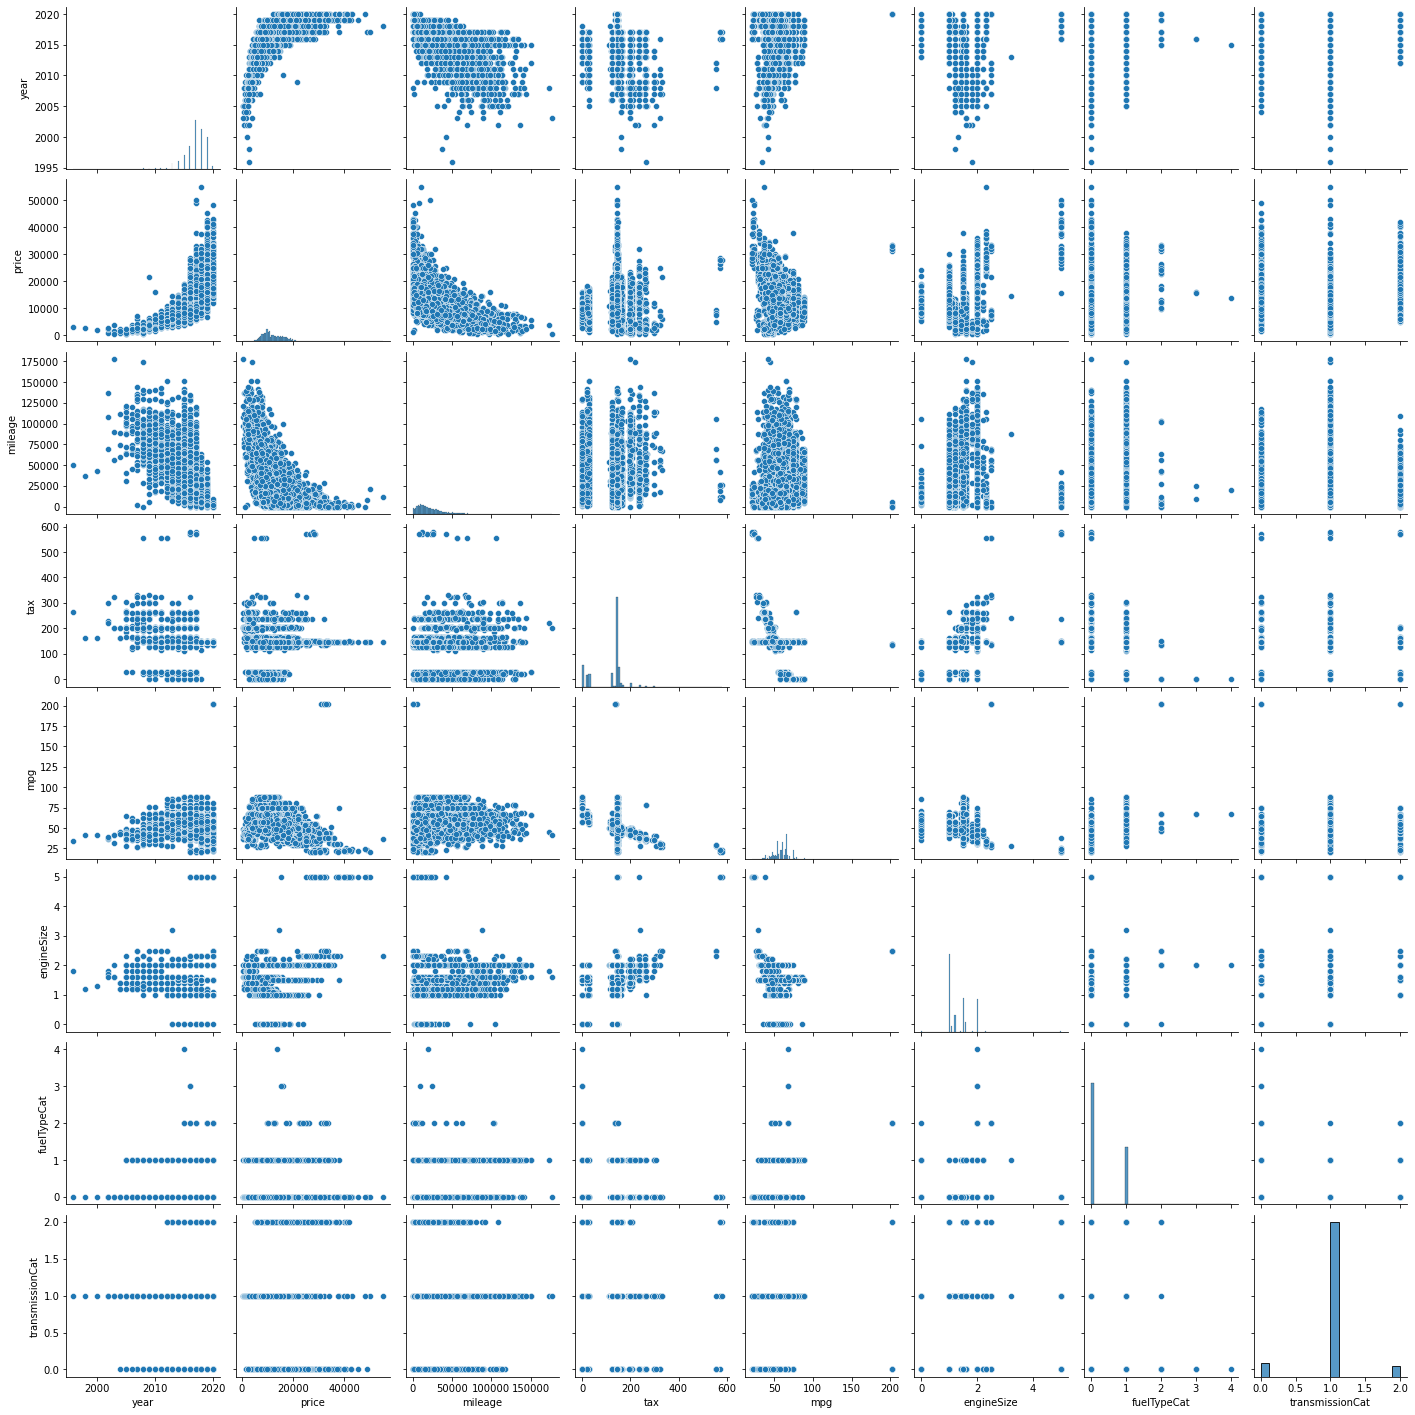

In [34]:
# Vamos analisar graficamente os dados do nosso DataFrame
sns.pairplot(df)

In [35]:
# Vamos fazer uma análise em relação ao preço, pois é o que queremos predizer.
# 1. É notável que quanto mais novo for o carro, maior será seu preço. (price x year)
# 2. Quanto mais milhas rodad\s o carro possui, menor será seu preço. (price x milleage)
# 3. Em (price x tax), a taxa acima de 400 dolares parece fugir do padrão de nossos dados, logo iremos elimina-las posteriormente
# 4. Da mesma forma existem dados acima de 100 mpg que parecem ser ruídos e serão também eliminados.
# 5. (price x engineSize) não nos dar uma relação muito forte
# 6. Tanto o tipo de combustível quando o tipo de transmissão parecem não interferir tanto no preço

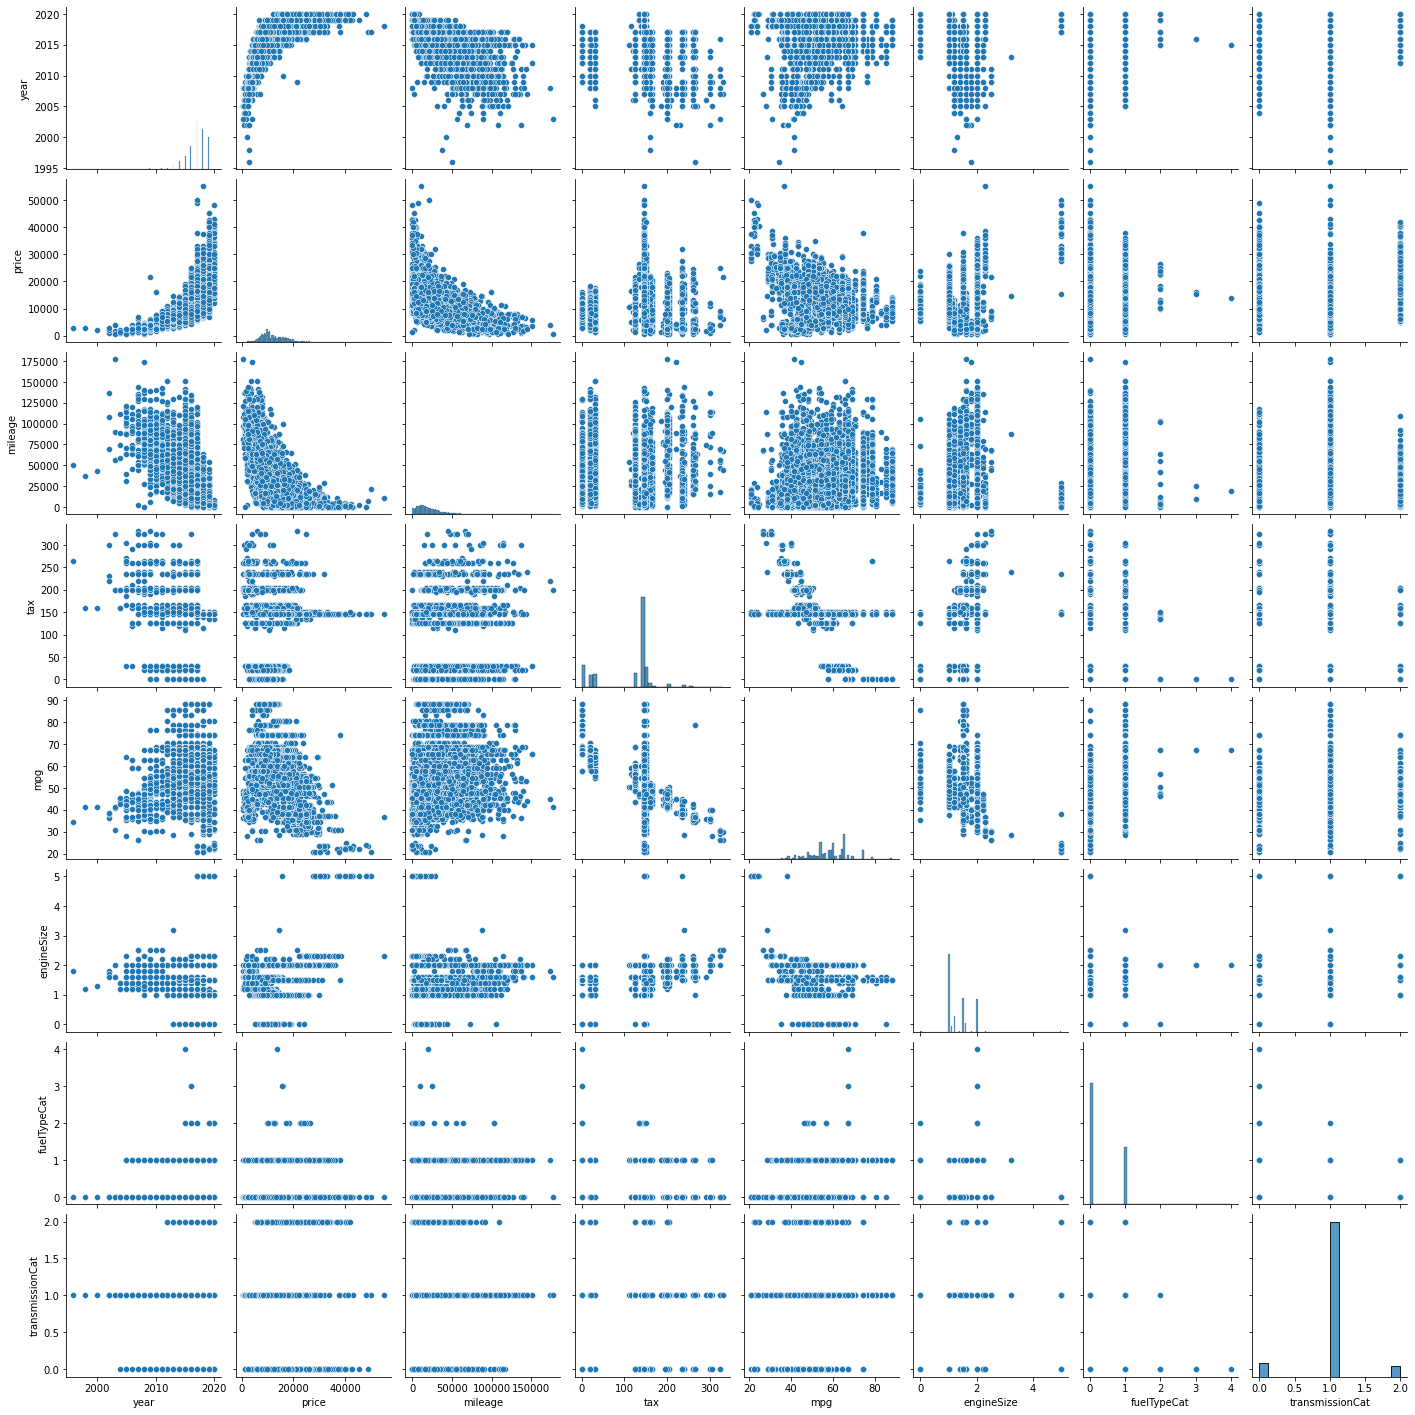

In [37]:
# Eliminando valores que parecem fugir do padrão das colunas 'tax' e 'mpg'
df.drop(df.loc[df['tax']>400].index, inplace=True)
df.drop(df.loc[df['mpg']>100].index, inplace=True)
sns.pairplot(df)

<AxesSubplot:>

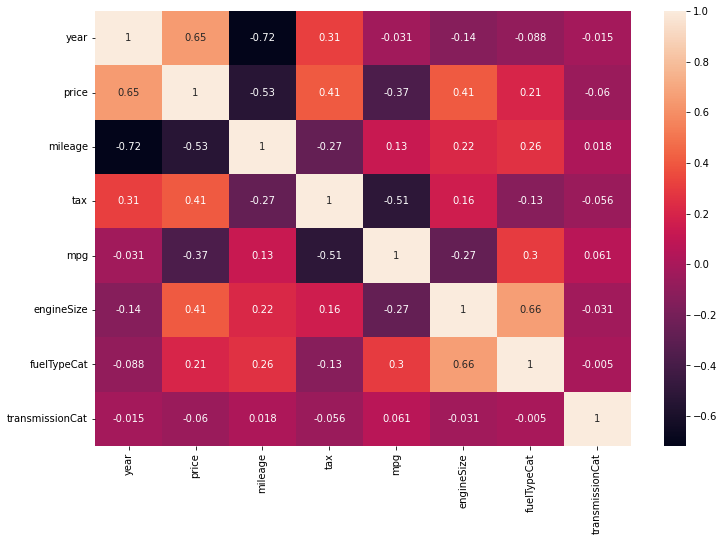

In [39]:
# Agora que temos os dados mais padronizados, vamos checar as correlações em um mapa da calor.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [40]:
# Podemos notar que nossa hipotese anterior é comprovada pelo mapa de calor. 

# Treinando Modelo

In [41]:
# Vamos definir nossa entrada, eliminamos todas as colunas object e a coluna preço que será o que queremos predizer:
X = df.drop(['model', 'price', 'transmission', 'fuelType'], axis=1)
X

,year,mileage,tax,mpg,engineSize,fuelTypeCat,transmissionCat
0,2017,15944,150,57.7,1.0,0,0
1,2018,9083,150,57.7,1.0,0,1
2,2017,12456,150,57.7,1.0,0,1
3,2019,10460,145,40.3,1.5,0,1
4,2019,1482,145,48.7,1.0,0,0
...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,0,1
17962,2014,40700,30,57.7,1.0,0,1
17963,2015,7010,20,67.3,1.6,1,1
17964,2018,5007,145,57.7,1.2,0,1


In [42]:
# Definimos nossa saída
y = df['price']
y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17948, dtype: int64

In [45]:
# Separar os dados de treino dos dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [46]:
# Verificar se foi dividido corretamente
X_train.shape

(14358, 7)

In [47]:
X_test.shape

(3590, 7)

In [48]:
# Essa função coloca os valores todos em uma escala mais próxima, evitando distorções grandes no desvio padrão dos dados.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'fuelTypeCat', 'transmissionCat'])
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'fuelTypeCat', 'transmissionCat'])
X_test

,year,mileage,tax,mpg,engineSize,fuelTypeCat,transmissionCat
0,0.068490,0.346726,-1.526841,1.129840,0.355549,1.437426,0.041715
1,0.068490,-0.163025,0.606801,0.802988,-0.814941,-0.683483,0.041715
2,0.068490,-0.127310,0.770927,-1.403268,0.589647,-0.683483,0.041715
3,-4.372276,3.387403,-1.362715,0.506778,0.589647,1.437426,0.041715
4,0.068490,-0.506261,0.524738,0.802988,-0.814941,-0.683483,0.041715
...,...,...,...,...,...,...,...
3585,0.561909,-0.832335,0.524738,-1.668835,1.526039,-0.683483,0.041715
3586,1.055327,-1.120838,0.524738,-1.015130,-0.346745,-0.683483,0.041715
3587,0.561909,-0.994830,0.524738,-1.015130,0.355549,-0.683483,-2.656217
3588,-0.424928,4.572751,-1.526841,0.966414,1.526039,1.437426,0.041715


In [49]:
# O GridSearchCV vai nos dizer os melhores parâmetros para utilizar na Regressão Linear automaticamente:
params = [
    {
        'fit_intercept':[True,False],
        'normalize':[True,False],
        'copy_X':[True,False],
        'n_jobs':[1,10,20,30,40],
        'positive':[True,False],
    }
]
ins = LinearRegression()
# O grid_search verifica todos os parametros e vai nos dizer qual a melhor escolha dos parâmetros. Ou seja, não precisamos
# ficar testando a mudança de cada parâmetro, ele mesmo faz isso para nós.
grid_search = GridSearchCV(ins, params, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': True,
 'positive': False}

In [50]:
# Os demais parâmetros não foram colocados aqui, pois já vem setados como default na função LinearRegression()
ins = LinearRegression(n_jobs=1, normalize=True)

In [52]:
# Agora iremos ver o que o nosso modelo preveu nas primeiras 10 amostras:
ins.fit(X_train, y_train)
pred = ins.predict(X_test)
pred[:10]

array([12350.91547447,  9620.77037168, 14858.01740577,  -947.95043626,
        9993.17241984, 15721.23359464,  6846.78550148, 10584.43526794,
       14473.71563612, 10072.36823226])

In [54]:
# E agora conferir os dados reais que o modelo deveria prever:
y_test[:10]

7376     10999
15515    10000
13820     9491
16356     2495
9768      9700
5602     16410
16524     6499
9921     11995
16112    17495
5243     10991
Name: price, dtype: int64

In [56]:
# Nosso modelo está acertando cerca de 74,4%
ins.score(X_test,y_test)

0.7439636898544901

In [58]:
# Nosso modelo erra cerca de 2340 dolares para cima ou para baixo (Desvio padrão)
print('RMSE', np.sqrt(mean_squared_error(y_test, pred)))

RMSE 2340.071692857839


In [59]:
# Validação cruzada afirma que o modelo acerta entre 74.38% e 74.39%
cross = cross_val_score(ins,X_test, y_test, cv=10)
final = sum(cross)/len(cross)
final

0.7438054181155983

In [61]:
# No final das contas o nosso modelo está errando por volta de 2340 dolares o que acaba sendo uma diferença grande para um possível vendedor do veículo.
# Talvez essa discrepância foi gerada porque o DataFrame temos vários modelos de carros diferentes e não foi levado em conta por exemplo
# o preço da matéria-prima ou tecnologia embutida neste veículo. Por exemplo, um Ford Mustang possui tecnologias muito mais avançadas do que
# um Ford Ka e foram todos colocados na mesma pesquisa sem levar em conta isso.
# Uma solução para esse problema seria filtrar nosso DataFrame pelo tipo de modelos de carro, garantindo assim uma analise mais certeira.